In [116]:
# Initialize Otter
import otter
grader = otter.Notebook("tutorial1_3.ipynb")

# Tutorial 1.3: Exploring the Google Play Store with Pandas 

Welcome to Tutorial 1.3!  In today's class we covered pandas and how to manipulate data in a DataFrame.

This tutorial is based on an assignment developed by [Jorge Mendez](https://www.seas.upenn.edu/~mendezme/) at UPenn and explores statistics about reviews from Google Play .

In [117]:
# Run this cell, but please don't change it.

# These lines load the tests.
import otter
grader = otter.Notebook()

import io
import pandas as pd
import numpy as np
import matplotlib as plt

## 1. Reading files
 
We provided two csv files in the `data/` directory. This tutorial will be based on those files

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

**Question 1.2:** Read in the csv file of the reviews and store the data as a dataframe and assign the dataframe the name `reviews_df`

In [118]:
reviews_df = pd.read_csv("data/googleplaystore_user_reviews.csv")
reviews_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [119]:
grader.check("q1_1")

q1_1 passed!

<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

**Question 1.2:** Read in the csv file of the data from the google play store. Save the data as a dataframe and assign the dataframe the name `apps_df`

In [120]:
apps_df = pd.read_csv("data/googleplaystore.csv")
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [121]:
grader.check("q1_2")

q1_2 passed!

<!--
BEGIN QUESTION
name: q1_3
points: 1
-->

Remember that in a table, each row represents an new individual item and the columns represent the item's attributes or features.
When working with a table, it is a good idea to get a sense of what the different attributes are

**Question 1.3:** Extract the names of the columns from `apps_df` as a list or index and assign the answer to the variable `store_columns`

*Hint:* The DataFrame object has an attribute that will return the column labels of the DataFrame.

In [122]:
store_columns = apps_df.columns
store_columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [123]:
grader.check("q1_3")

q1_3 passed!

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

**Question 1.4:** Extract the names of the columns from `reviews_df` as a list or index and assign the answer to the variable `review_columns`

*Hint:* The DataFrame object has an attribute that will return the column labels of the DataFrame.

In [124]:
review_columns = reviews_df.columns
review_columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [125]:
grader.check("q1_4")

q1_4 passed!

## 2. Data Filtering

Often times an individual in a table may be missing a value for one or more attributes. 
Usually, missing values will be represented as a numpy `Nan`. According to the [NumPy documentation](https://numpy.org/doc/stable/reference/constants.html#numpy.nan), a `Nan` is 
> A floating point representation of Not a Number

The following line is how we access the Nan value.

In [13]:
np.nan

nan

Since a Nan is a floating point representation, that means we can compare it to numbers, i.e. integers and floats

In [212]:
np.nan > 1

False

In [14]:
np.nan < -1

False

In [214]:
np.nan == 0

False

We check if the value assigned to a variable is `Nan` by using the `numpy` method called `.isnan()` as shown in the next few cells

In [15]:
nan_variable = np.nan
one = 1

np.isnan(one), np.isnan(nan_variable)

(False, True)

In [16]:
array_with_one_nan = np.append(np.arange(10), np.nan)

array_with_one_nan, np.isnan(array_with_one_nan)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan]),
 array([False, False, False, False, False, False, False, False, False,
        False,  True]))

<!--
BEGIN QUESTION
name: q2_1
points: 
    - 0.75
    - 0.75
-->

Often times an individual in a table may be missing a value for one or more attributes.

**Question 2.1:** Remove any review from `reviews_df` that does not contain either a Translated Review or a Sentiment and store the resulting dataframe in the same `reviews_df` variable. 
    
*Hint:* The `pd.dropna()` function will be helpful for this. 

In [126]:
reviews_df = reviews_df.dropna()
reviews_df.shape

(37425, 5)

In [127]:
grader.check("q2_1")

q2_1 passed!

Often times we need to validate our data and remove outliers or values that are invalid

The following cell will print out a pandas Series where the index is a rating and the corresponding value is the number of apps that have that rating.

In [128]:
apps_df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

<!--
BEGIN QUESTION
name: q2_2
points: 1
-->

Looking towards the bottom, we will notice that there is one app that has a rating of 19.0, however, the ratings can only range betwen 0 and 5.

**Question 2.2:** Remove any apps from `apps_df` whose `Rating` is invalid (> 5) and store the resulting dataframe in `apps_df`

In [129]:
apps_df = apps_df[apps_df['Rating']<5]

In [130]:
grader.check("q2_2")

q2_2 passed!

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
points: 3
manual: true
-->


**Question 2.3:** `Translated_Review` contains the text of the reviews. Create a new column in `reviews_df` called `Review_Length` that contains the number of words in each review (for this question assume that words are seperated by white space). Then use the DataFrame `describe()` function to print descriptive statistics about the length of the reviews.

In [131]:
reviews_df["Review_Length"] = reviews_df["Translated_Review"].map(lambda x: len(x.split()))
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_Length
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,21
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,7
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,6
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,3
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,2
...,...,...,...,...,...,...
64220,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,22
64221,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,29
64224,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,15
64225,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,15


In [132]:
reviews_df["Review_Length"].describe()

count    37425.000000
mean        18.350007
std         16.646923
min          1.000000
25%          6.000000
50%         14.000000
75%         26.000000
max        345.000000
Name: Review_Length, dtype: float64

<!-- END QUESTION -->



Run the next cell to plot a histogram of the number of words in each review.

<AxesSubplot:ylabel='Frequency'>

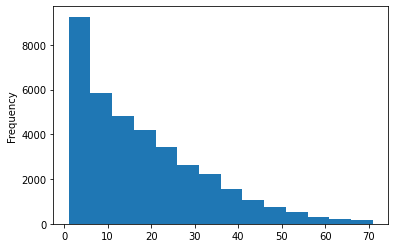

In [133]:
reviews_df['Review_Length'].plot.hist(bins=np.arange(1,75,5))

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_4
points: 2
manual: true
-->


**Question 2.4:** Based on the descriptive statistics, do you think the mean is roughly equal to, higher, or lower the median value. Justify

Higher (Mean = 18.35, 50%/Median = 14.00)

<!-- END QUESTION -->



## 3. Visualization

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_1
points: 1.5
manual: true
-->


**Question 3.1:** Produce a pie chart with the Android Ver requirements for the different apps. Group together all
versions that make up less than 5% of the total apps into a single `Other` category. This should look
similar to ![this](images/pie.png). Don't forget to include a title for the figure.

*Hint 1:* You will find the df.value counts() function useful for solving this problem.

*Hint 2:* This [stackoverflow](https://stackoverflow.com/questions/55564896/pandas-python-grouping-counts-to-others) answer will be useful.

In [134]:
versions = apps_df["Android Ver"].value_counts()
summation = sum(apps_df["Android Ver"].value_counts())
other = sum(versions[12:])
chart = versions[:12]
chart["other"] = other
chart


4.1 and up            1962
Varies with device    1318
4.0.3 and up          1201
4.0 and up            1096
4.4 and up             840
2.3 and up             572
5.0 and up             526
4.2 and up             325
2.3.3 and up           234
3.0 and up             206
4.3 and up             203
2.2 and up             201
other                  406
Name: Android Ver, dtype: int64

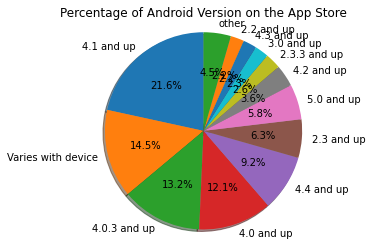

In [135]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = chart.index
sizes = chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Android Version on the App Store")


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_2
points: 1.5
manual: true
-->


**Question 3.2:** Create a similar pie chart for app `Category`. In this case, group together categories that make up less
than 3% of the apps. The resulting graph should look something like ![](images/pie2.png) .

In [136]:
categories = apps_df["Category"].value_counts()
summation = sum(apps_df["Category"].value_counts())
other2 = sum(categories[13:])
chart2 = categories[:13]
chart2["other"] = other2
chart2


FAMILY                1680
GAME                  1085
TOOLS                  717
PRODUCTIVITY           343
COMMUNICATION          323
MEDICAL                322
FINANCE                315
SPORTS                 315
PHOTOGRAPHY            311
PERSONALIZATION        304
BUSINESS               285
LIFESTYLE              285
HEALTH_AND_FITNESS     285
other                 2522
Name: Category, dtype: int64

In [29]:
#Check to see where .03 boundary is
#sum(categories[27:])/sum(categories)
sum(chart2) == sum(categories)

True

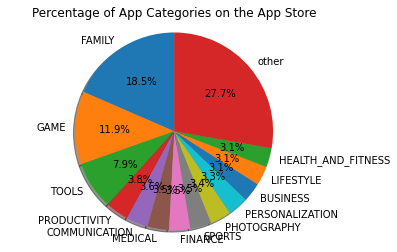

In [137]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = chart2.index
sizes = chart2

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of App Categories on the App Store")


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_3
points: 2
manual: true
-->


**Question 3.3:** Generating histograms of the Rating and Reviews across all apps, with 20 bins each. The histgrams should look like ![this](images/histograms.png)


*Hint:* Remember that histograms are used for numeric data. You might need to convert the values in one of the columns to a numeric type.

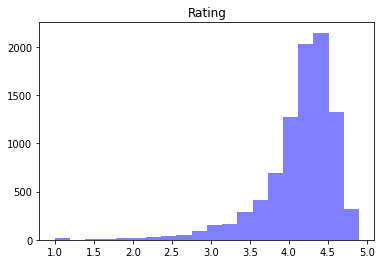

In [141]:

import matplotlib.mlab as mlab

x = apps_df["Rating"]
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title("Rating")
plt.show()

In [139]:
type(apps_df["Reviews"].astype(int)[0]), type(apps_df["Reviews"][0])

(numpy.int64, str)

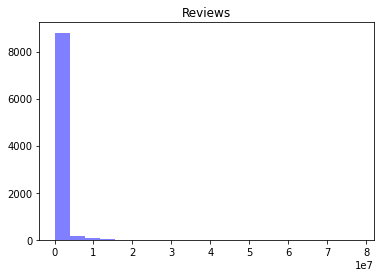

In [143]:
x = apps_df["Reviews"].astype(int)
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title("Reviews")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_4
points: 1.5
manual: true
-->


**Question 3.4:** Plot a bar chart with the number of reviews that received the different `Sentiment` values. The sentiments chart should look similar to ![this](images/bar.png)

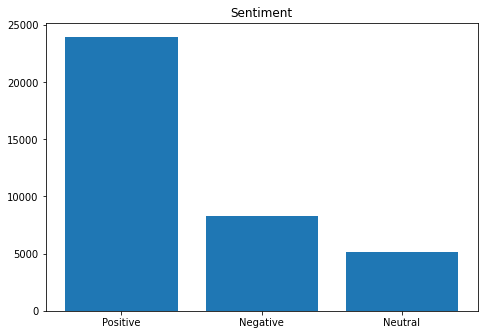

In [144]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentiment_type = ["Positive", "Negative", "Neutral"]
amount = reviews_df["Sentiment"].value_counts()
ax.bar(sentiment_type, amount)
plt.title("Sentiment")
plt.show()

In [145]:
reviews_df["Sentiment"].value_counts()

Positive    23997
Negative     8270
Neutral      5158
Name: Sentiment, dtype: int64

<!-- END QUESTION -->



## 4. Combining Dataframes

<!--
BEGIN QUESTION
name: q4.1
points: 1
-->


**Question 4.1:** Combine the two DataFrames into a single one, based on the App names, and store the resulting dataframe in a variable called `merged_df`. You should make sure that
all apps from the apps DataFrame are kept, and no app beyond those is added. 

*Hint:* The `pd.merge` function will be useful.

In [146]:
merged_df = apps_df.merge(reviews_df, how = 'left')


print(f"merged_df has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")

merged_df has 80428 rows and 18 columns


In [147]:
print(f"apps_df has {apps_df.shape[0]} rows and {apps_df.shape[1]} columns")
print(f"reviews has {reviews_df.shape[0]} rows and {reviews_df.shape[1]} columns")

apps_df has 9092 rows and 13 columns
reviews has 37425 rows and 6 columns


In [148]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review_Length
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,12.0
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,3.0
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,1.0
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80423,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,NaN,NaN,NaN,NaN,NaN
80424,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,NaN,NaN,NaN,NaN,NaN
80425,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN,NaN
80426,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN,NaN


In [149]:
grader.check("q4.1")

q4.1 passed!

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4.2
points: 4
manual: true
-->


**Question 4.2:** Group the Sentiment by rounded Rating, and produce a bar chart where you display the different
sentiments grouped by rating. The chart should look like ![this](images/combined_bar.png)

*Hint:* You might find the `np.round`, `pd.groupby` and `df.unstack` functions
helpful for this task.

In [213]:
merged_df_sentiment = merged_df[["Sentiment","Rating"]]
list_rounded = list(merged_df_sentiment["Rating"].round())
list_sentime = merged_df_sentiment["Sentiment"].tolist()
new_merged_df_sentiment = pd.DataFrame({"Sentiment":list_sentime, "Rating":list_rounded})
new_merged_df_sentiment = new_merged_df_sentiment.dropna()
described_3 = new_merged_df_sentiment[new_merged_df_sentiment["Rating"] == 3.0].groupby("Sentiment").count()
described_4 = new_merged_df_sentiment[new_merged_df_sentiment["Rating"] == 4.0].groupby("Sentiment").count()
described_5 = new_merged_df_sentiment[new_merged_df_sentiment["Rating"] == 5.0].groupby("Sentiment").count()
#merged_df_sentiment[merged_df_sentiment["Sentiment"] == 'Negative']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

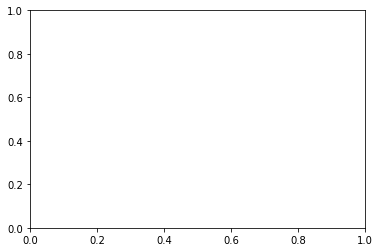

In [214]:
labels = [3.0, 4.0, 5.0]
three = described_3
four =described_4
five = described_5

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, pos_sent, width, label='Positive')
rects2 = ax.bar(x + width/3, neg_sent, width, label='Negative')
rects3 = ax.bar(x, neut_sent, width, label='Netural')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number of Apps')
ax.set_title('Rating')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [114]:
grader.check_all()

q1_1 passed!

q1_2 results:

Trying:
    assert apps_df.shape == (10841, 13)
Expecting nothing
**********************************************************************
Line 1, in q1_2 1
Failed example:
    assert apps_df.shape == (10841, 13)
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q1_2 1[0]>", line 1, in <module>
        assert apps_df.shape == (10841, 13)
    AssertionError


q1_3 passed!

q1_4 passed!

q2_1 results:

Trying:
    assert reviews_df['Translated_Review'].isna().value_counts().shape[0] == 1
Expecting nothing
**********************************************************************
Line 2, in q2_1 0
Failed example:
    assert reviews_df['Translated_Review'].isna().value_counts().shape[0] == 1
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q2_1 0[0]>", line 1, in <module>
        assert reviews_df['Translated_Review'].isna().value_counts().shape[0] == 1
    AssertionError

Trying:
    assert reviews_df['Sentiment'].isna().value_counts().shape[0] == 1
Expecting nothing
**********************************************************************
Line 2, in q2_1 1
Failed example:
    assert reviews_df['Sentiment'].isna().value_counts().shape[0] == 1
Exception raised:
    Traceback (most recent call last):
      File "/opt/conda/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q2_1 1[0]>", line 1, in <module>
        assert reviews_df['Sentiment'].isna().value_counts().shape[0] == 1
    AssertionError


q2_2 passed!

q4.1 passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [239]:
# Save your notebook first, then run this cell to export your submission.
grader.export()